## Introduction

In this research analysis we will be comparing precipitation levels in New York City and Seattle. The purpose of this analysis will be to see which city has higher average precipitation levels and specifically which parts of the year is it at its hiighest and lowest.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import altair as alt

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [34]:
df_rainfall = pd.read_csv('https://raw.githubusercontent.com/siennamart/Seattle-Weather/main/SM_clean_seattle_nyc_weather.csv')
df_rainfall

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.21,1,2020
3,2020-01-04,NYC,0.12,1,2020
4,2020-01-05,NYC,0.00,1,2020
...,...,...,...,...,...
2917,2023-12-27,SEA,0.00,12,2023
2918,2023-12-28,SEA,0.26,12,2023
2919,2023-12-29,SEA,0.08,12,2023
2920,2023-12-30,SEA,0.02,12,2023


##### $\rightarrow$ Review the contents of the data set.
- This dataset contains combined data from seattle and new york city rainfall stations of precipitation levels everyday for three years from various data stations throughout the state.

## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.
- Which city has the highest rainfall/ precipitation level per year?
- Which seasons are have the least amount of rainfall if someone wanted to plan travel around the rain?
- How does precipitation vary by year? Could there have been natural disasters or environmental facotors that influenced this.

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

The following code generates a line chart that shows the change in average precipitation of each month in each city using Altair.

In [70]:
df_avg_precipitation = df_rainfall.groupby(['city', 'month']).agg({'precipitation': 'mean'}).reset_index()

alt.Chart(df_avg_precipitation).mark_line().encode(
    alt.Y('precipitation:Q', title='Average Precipitation (inches)'),
    alt.X('month:O', title='Month', axis=alt.Axis(labelAngle=45)),
    alt.Color('city:N', title='City')
).properties(
    width=800,
    height=400,
    title='Precipitation Average'
)

alt.Chart(...)

I chose to do this chart in Altair because it it what I am familar with from the last data visualization course I took. It clearnly shows the average precipitation on each month and how it changes throughout the year for each city. Seattle is seen in orange and New York is in blue.

The code below creates a histogram chart showing the average precipitation of each city by year.

In [85]:
df_avg_precipitation = df_rainfall.groupby(['city', 'year']).agg({'precipitation': 'mean'}).reset_index()
alt.Chart(df_avg_precipitation).mark_bar().encode(
    x='city:O',
    y='precipitation:Q',
    color='city:N',
    column='year:O'
).properties(
    width=200,
    height=400,
    title='Precipitation Average'
)

alt.Chart(...)

The chart above is good at showing the comparison of precipitation by year and we can see the Seattle rainfall stays pretty consistent every year. This was also created using Altair.

The code below creates a heatmap in altair that compares the amount of precipitation per month between New York and Seattle.

In [68]:
df_avg_precipitation = df_rainfall.groupby(['city', 'month']).agg({'precipitation': 'mean'}).reset_index()

heatmap = alt.Chart(df_avg_precipitation).mark_rect().encode(
    alt.X('month:O', title='Month', axis=alt.Axis(labelAngle=45)),
    alt.Y('city:N', title='City'),
    alt.Color('precipitation:Q', title='Average Precipitation (inches)', scale=alt.Scale(scheme='blues'))
).properties(
    width=600,
    height=400,
    title='Average Precipitation by Month and City'
)

text = heatmap.mark_text(baseline='middle').encode(
    text=alt.Text('precipitation:Q', format='.2f'),
    color=alt.value('black')
)

heatmaptext = heatmap + text

heatmaptext

alt.LayerChart(...)

As you can see, as precipitation increases, the darker the blue becomes which gives us a more visual way to interpret the increases and decreases.

The code below was down produces a line graph that separated the data by season.

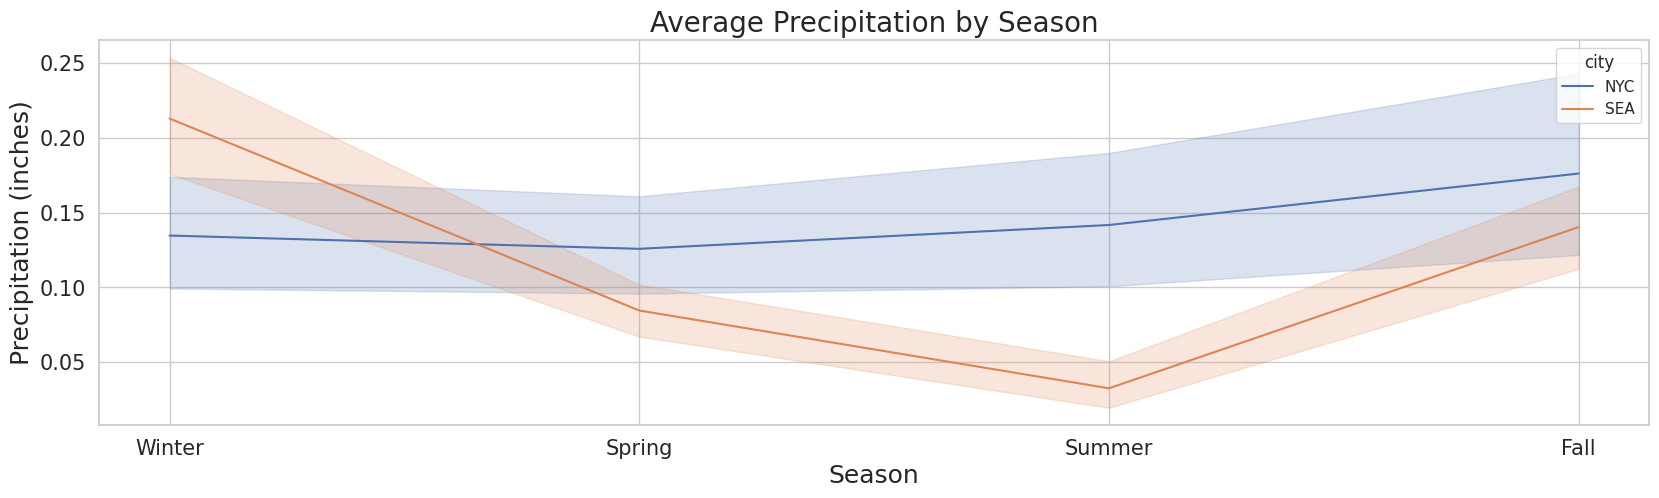

In [81]:
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_rainfall['season'] = df_rainfall['month'].apply(map_month_to_season)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df_rainfall, x='season', y='precipitation', hue='city')

plt.xlabel('Season', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(4), labels=['Winter', 'Spring', 'Summer', 'Fall'])

plt.tick_params(labelsize=15)

plt.title('Average Precipitation by Season', fontsize=20)

plt.show()

I created this graph using the demonstartion in class and added the parameters to create divisions in the graph to show when the seasons start and end to give an idea of what precipitation is in different seasons.

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment. Above I have created clear line graphs, histograms, and a heatmap to communicate this data.

## Conclusion

Provide a brief description of your conclusions.

The city of Seattle has higher average rainfall per year than New York City. Specifically during late fall and winter are when these precipitartion levels are at its peak. For New York city, its peak months of rainfall are in Fall which are similar to Seattle. Overall the rainfall in Seattle is more consistant than New York citys rainfall which we can see in our yearly histogram.